## This data preprocessing is similar to original preprocessing but, here I am not removing Gender and HomeOwnership columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.impute import SimpleImputer
#from sklearn_pandas import CategoricalImputer

In [2]:
excel_df= pd.read_excel("../Bank_loan_data.xlsx", sheet_name ="Data")

In [3]:
description_df= pd.read_excel("../Bank_loan_data.xlsx", sheet_name="Description")

In [4]:
description_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


In [5]:
excel_df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0,1,0,0.0,0
1,2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0,1,0,0.0,0
2,3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0,0,0,0.0,0
3,4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0,0,0,0.0,0
4,5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0,0,0,0.0,1


In [6]:
excel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              480 non-null    object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      480 non-null    object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [7]:
excel_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df= excel_df
df.shape

(5000, 16)

In [9]:
df["Personal Loan"].unique()

array([0, 1, ' '], dtype=object)

In [10]:
df["Personal Loan"].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

In [11]:
# Deleting one value which has empty string ' ':
df.drop(df[df['Personal Loan'] == ' '].index, inplace = True)
df["Personal Loan"].value_counts()

0    4520
1     479
Name: Personal Loan, dtype: int64

### Hence, it is a case of class imbalance

In [12]:
numeric_cols = ['ID','Age','Experience','Income','Family','CCAvg','Mortgage'] 
## here, I have put ID in numeric just to include all columns. Since no missing values ID,so imputing values doesnot make change.
categorical_cols = ['ZIP Code','Education','Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard','Home Ownership','Gender']

# Now, analyzing every case of : numerical, categorical(nominal and ordinal).

# Univariate Analysis

### for the case of categorical data:|

##### Note: Here, zip must be processed in EDA section to gain sensible information. 

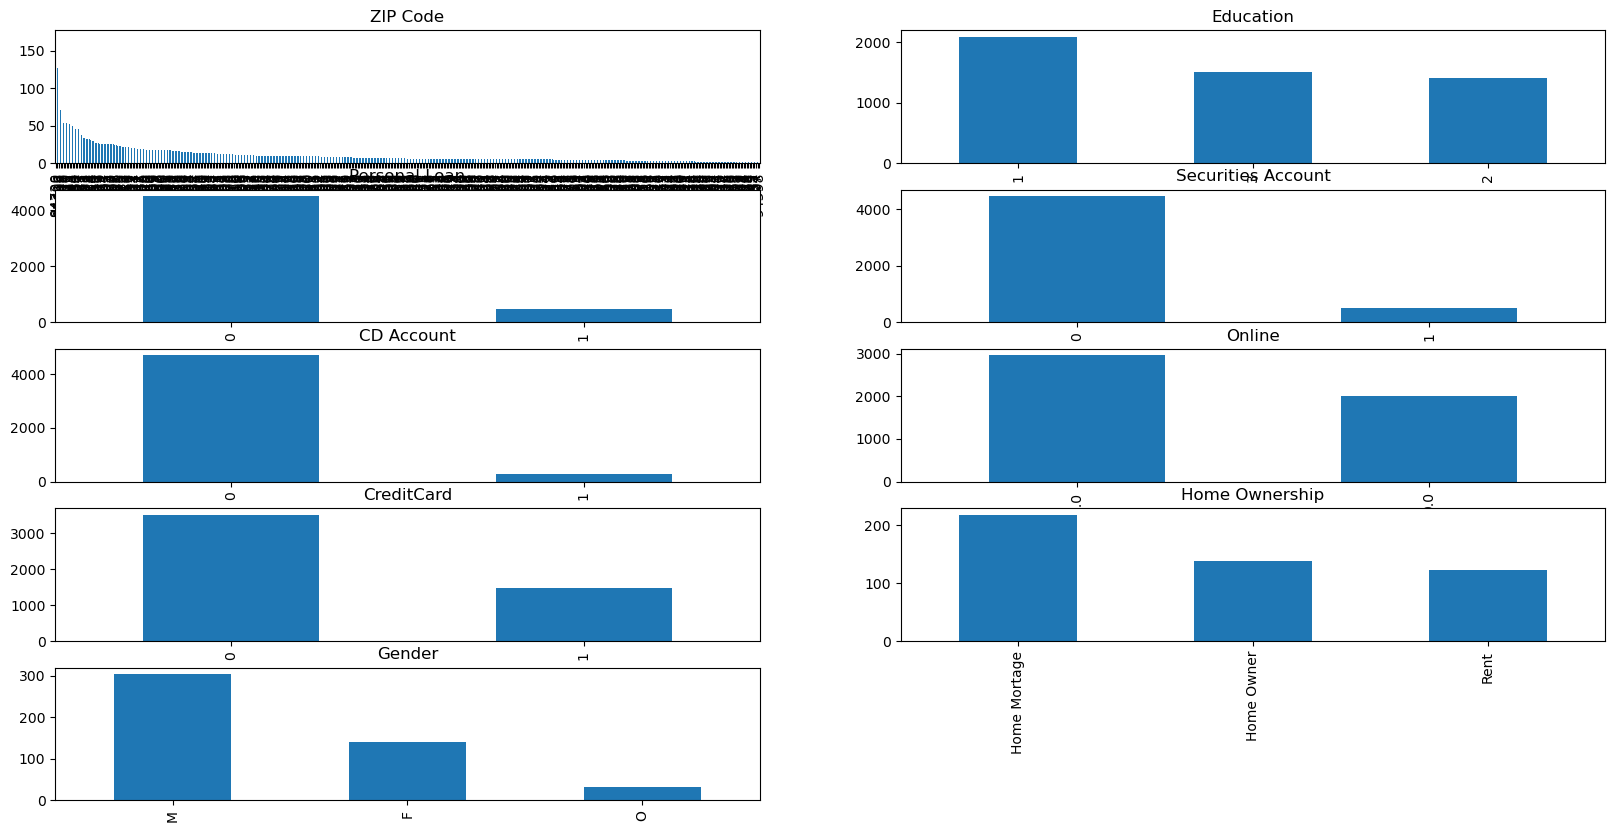

In [13]:
no_row = math.ceil(len(categorical_cols)/2)
i = 1
for column in categorical_cols:
    plt.subplot(no_row,2,i)
    df[column].value_counts().plot.bar(figsize=(20,10), title=column)
    i += 1
plt.show()

### for the case of numercial data

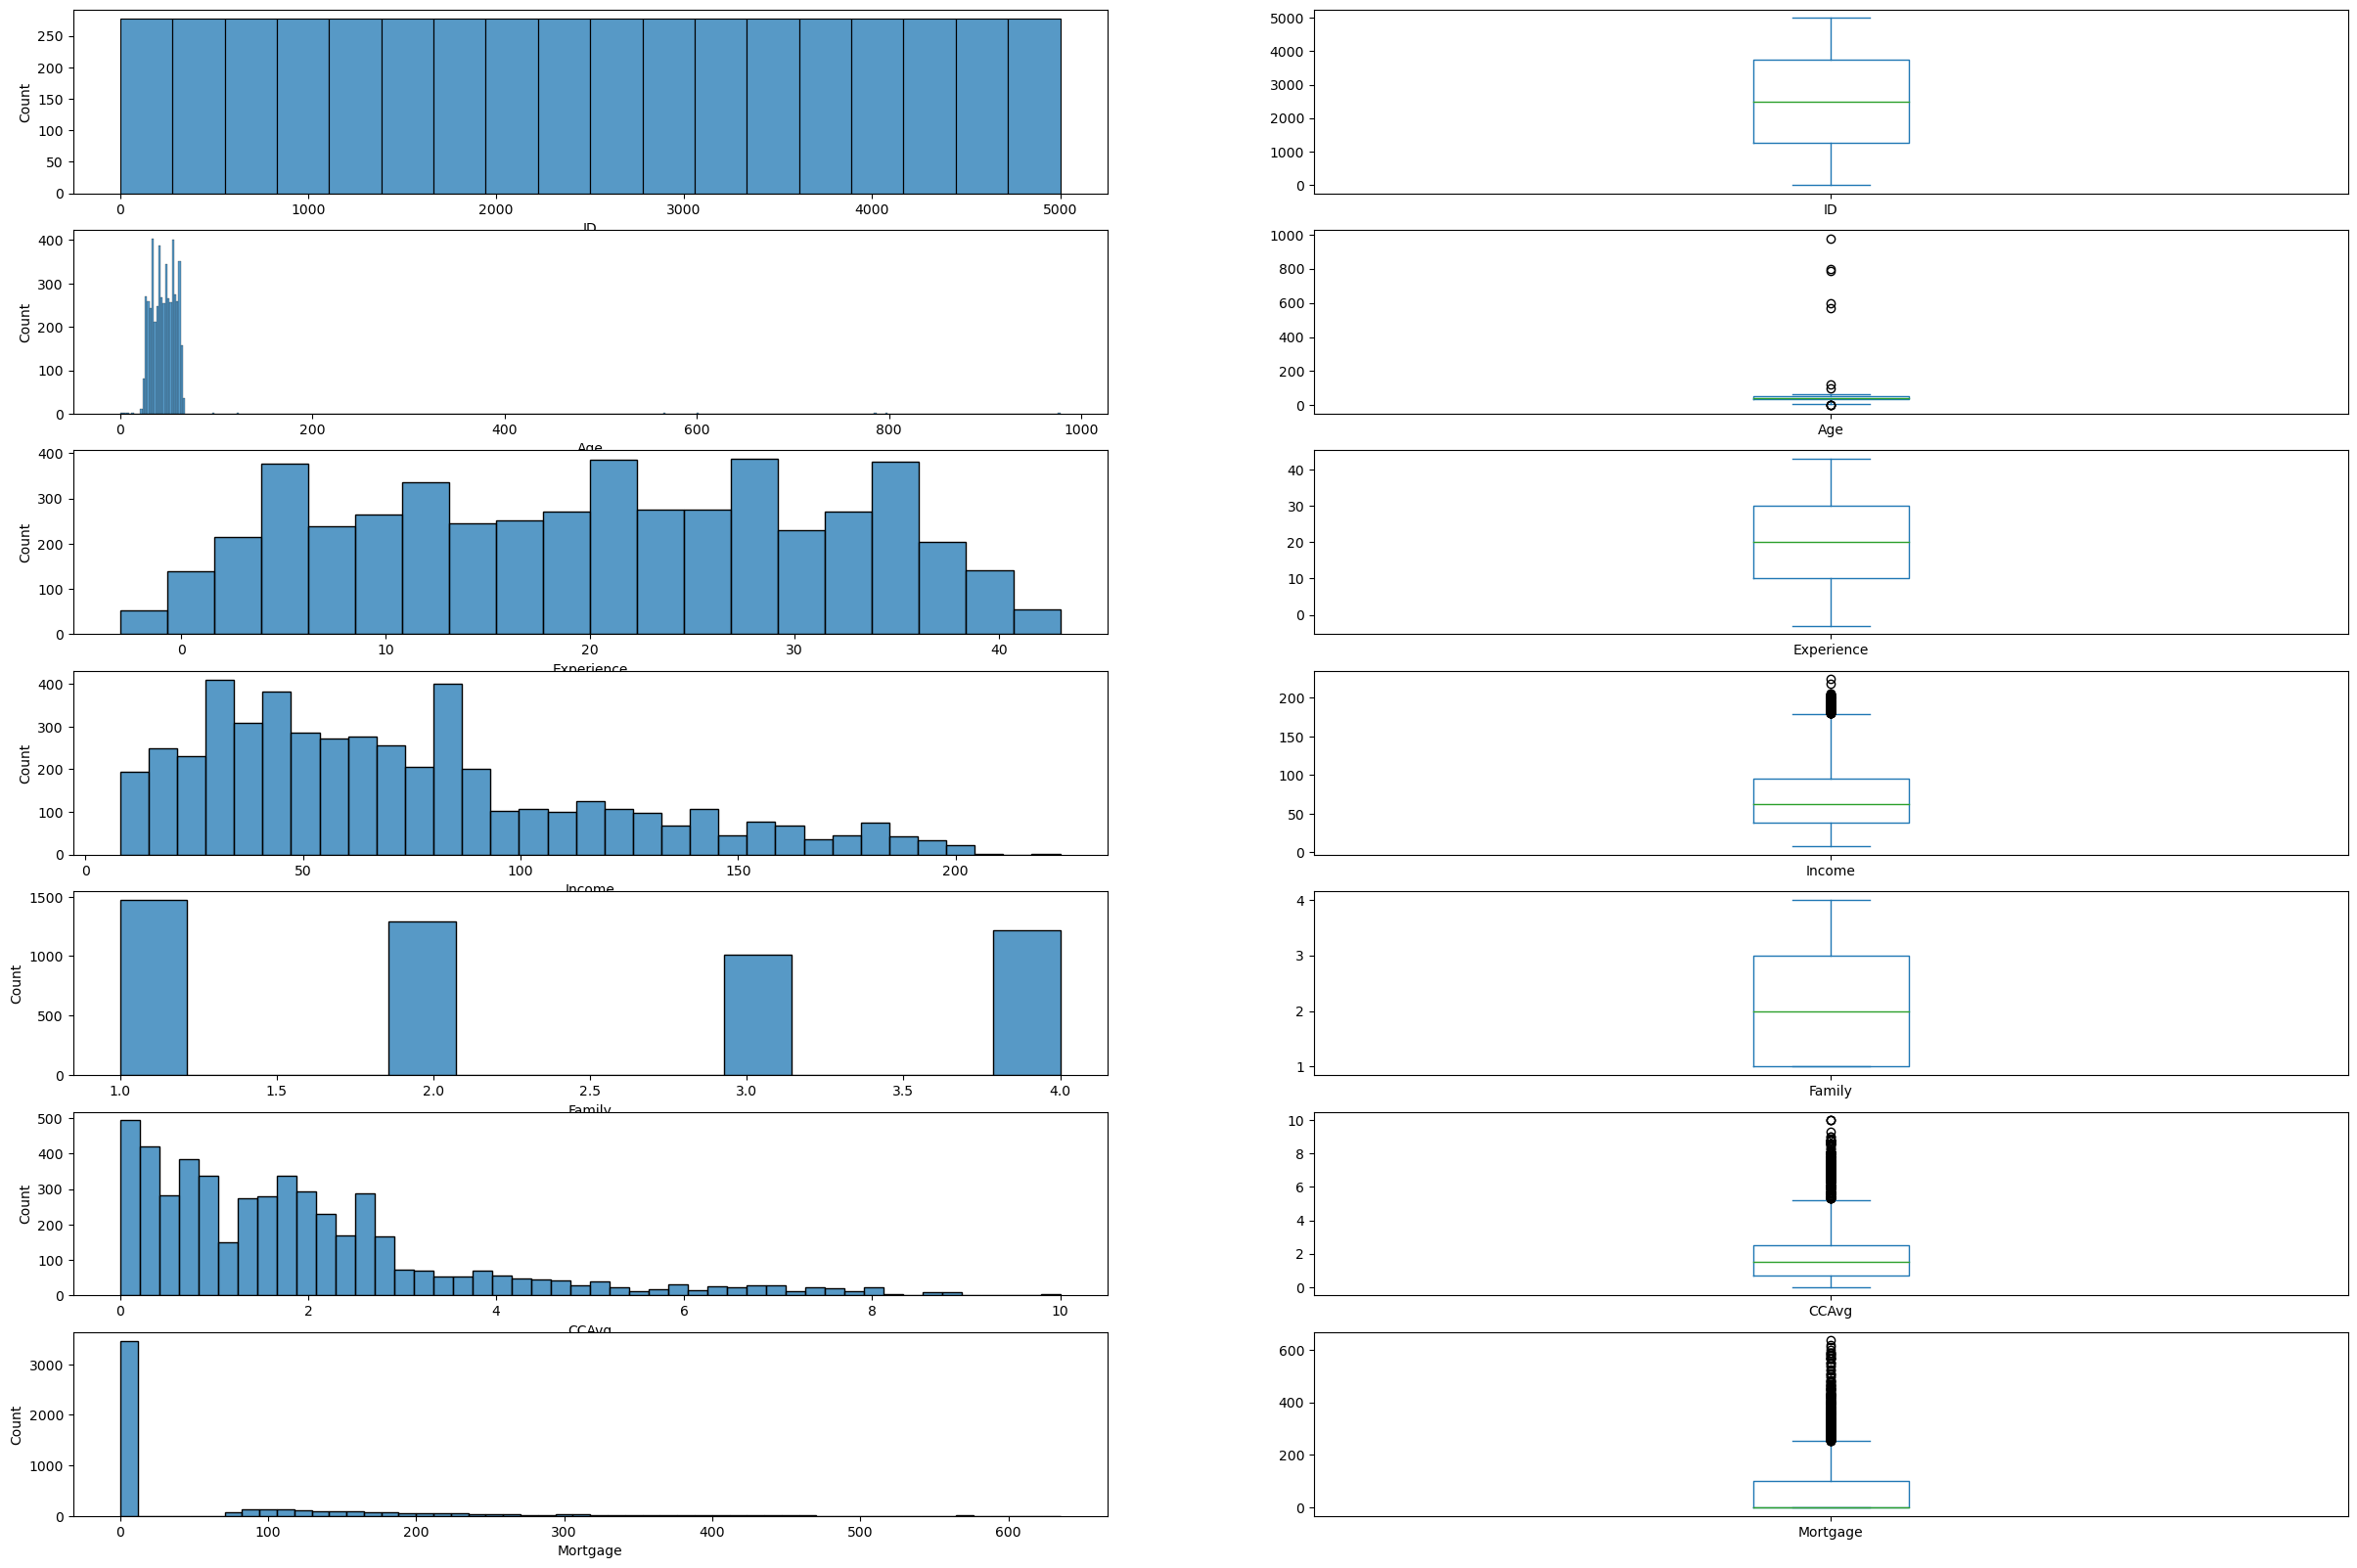

In [14]:
no_row = math.ceil(len(numeric_cols))
i = 1
for column in numeric_cols:
    plt.subplot(no_row,2,i)
    #plt.figure(figsize=(20,10)) 
    sns.histplot(df[column])
    #plt.title(label=column)
    i += 1
    plt.subplot(no_row,2,i)
    df[column].plot.box(figsize=(30,20))
    i += 1
plt.show()
#     train[‘ApplicantIncome’].plot.box(figsize=(16,5))
#     plt.show()

### we can clearly see that: 
#### 1) Id is normally distributed with no outlier. But, this column is of no use.
#### 2) Age is skewed towards left side since there's outliers as we can clearly see in box plot also.
#### 3) Experience seems to be in gaussian distribution which also cna be verified from the box plot.
#### 4) Income is slightly skewed towards left which can be considered ok.
#### 5) Family attribute is normally distributed.
#### 6) But CCAvg is left skewed.
#### 7) Mortgage seem to be abnormal. majority of them have no mortgage. That's why it is skewed towards left. However, there's
#### an interesting pattern towards the mid-right of the figure. We can some how figure out some sorts of normal distribution with
#### relatively small amplitude.


## So, for these log transformation is needed to transfer domain in normal distribution.

# Bivariate ANalysis

### categorical vs target

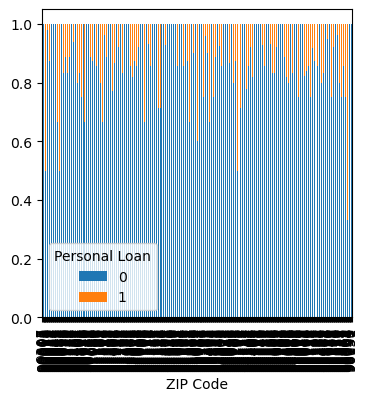

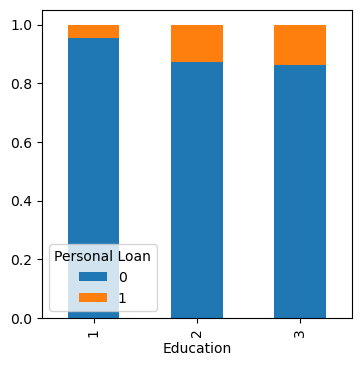

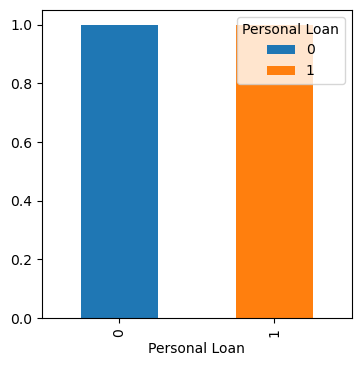

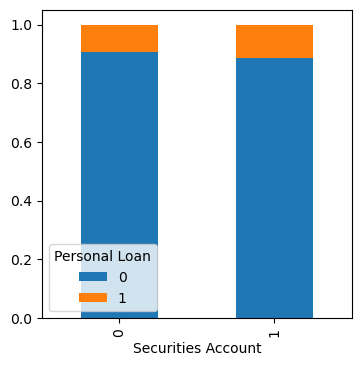

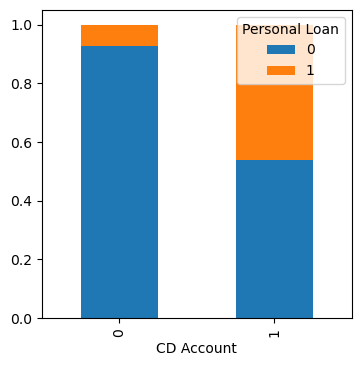

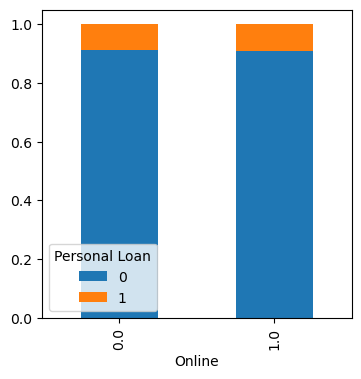

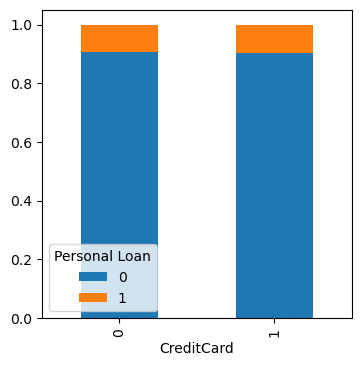

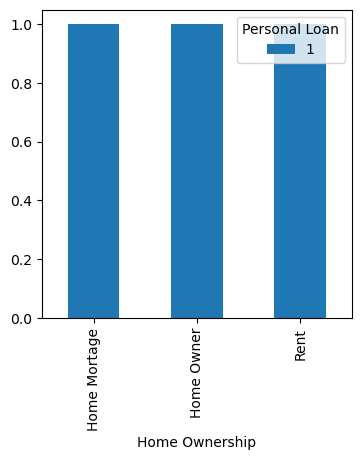

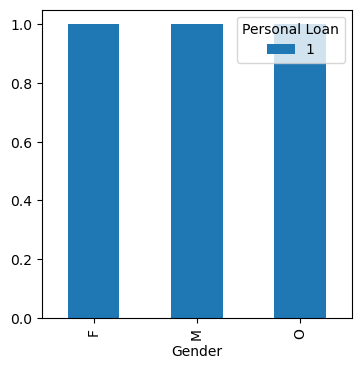

In [15]:
no_row = math.ceil(len(categorical_cols)/2)
i = 1
for column in categorical_cols:
    #plt.subplot(no_row,2,i)
    latest_value=pd.crosstab(df[column],df['Personal Loan'])
    latest_value.div(latest_value.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
    #i += 1
plt.show()


In [16]:
#number of missing values:
df.isnull().sum()

ID                       0
Age                      0
Gender                4520
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        4520
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [17]:
#calcaulating the missing value percentage:
miss_val_df = pd.DataFrame(df.isnull().sum(),columns=['Null Count'])
miss_val_df['% of NaN'] = miss_val_df['Null Count']/df.shape[0]*100
miss_val_df

,Null Count,% of NaN
ID,0,0.000000
Age,0,0.000000
Gender,4520,90.418084
Experience,0,0.000000
Income,67,1.340268
ZIP Code,0,0.000000
Family,0,0.000000
CCAvg,0,0.000000
Education,0,0.000000
Mortgage,0,0.000000


<Axes: ylabel='% of NaN'>

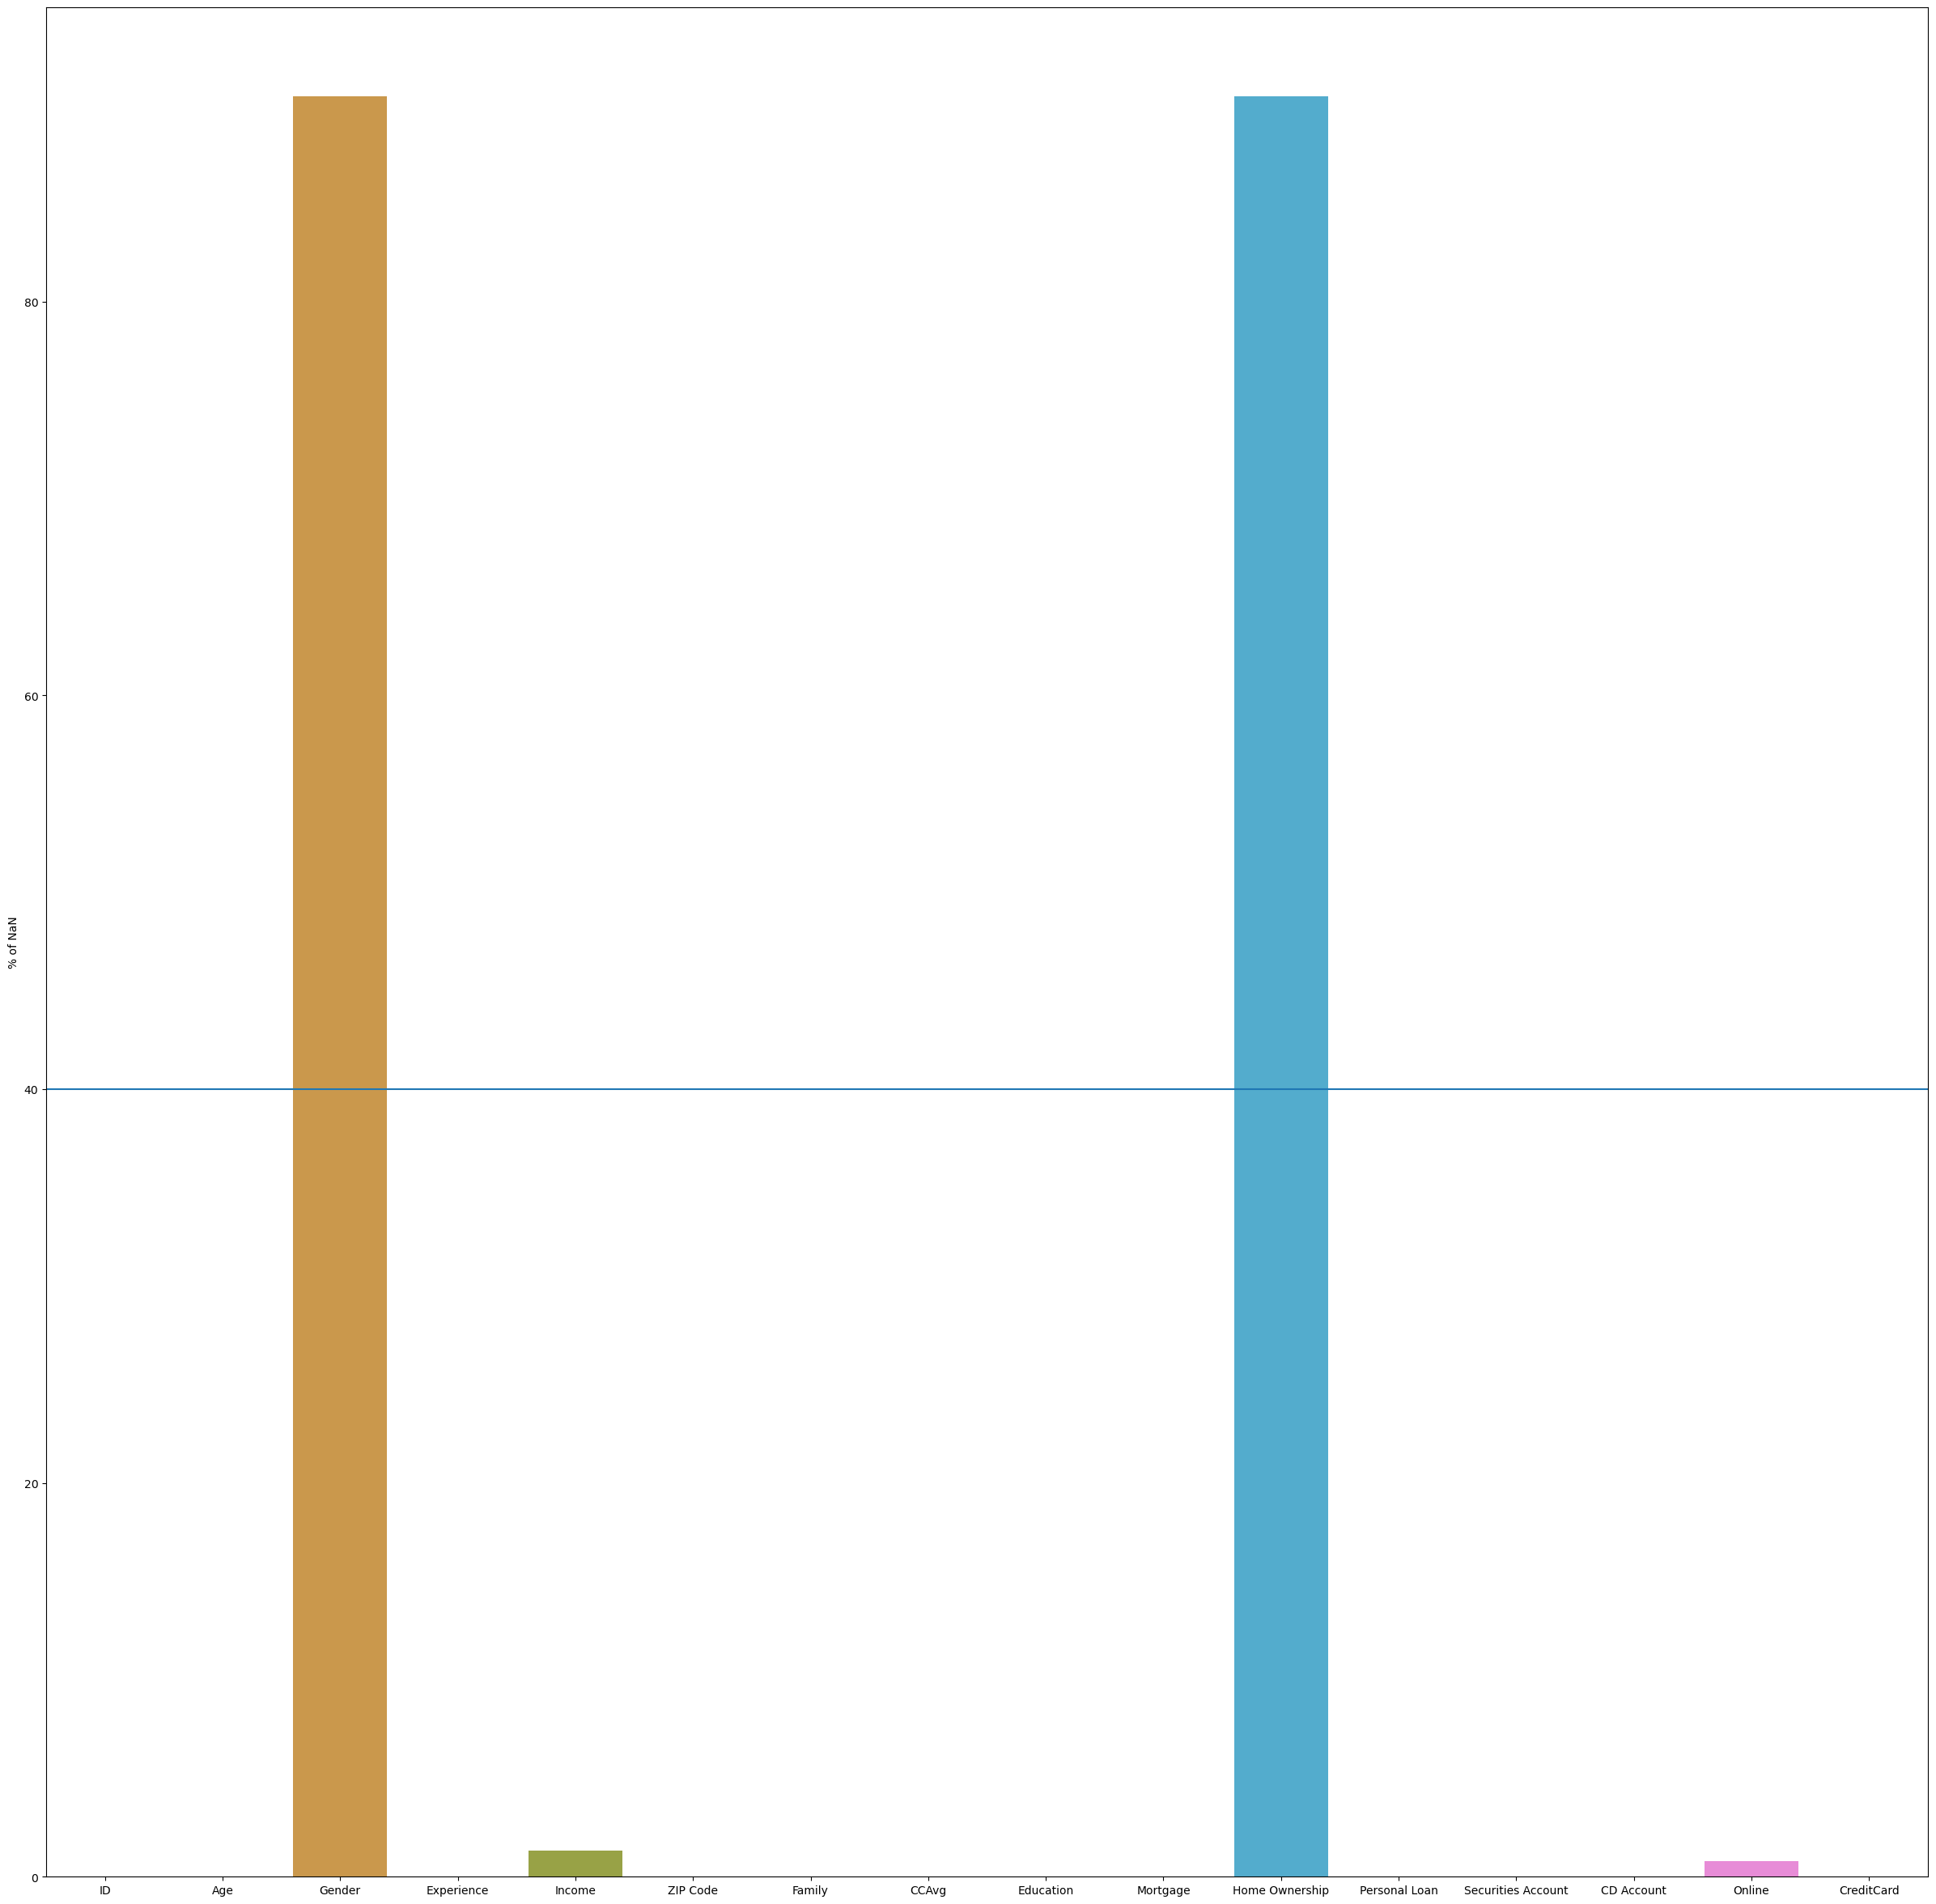

In [18]:
#ploting to see the percentage of missing values:
plt.figure(figsize=(30,30))
plt.axhline(40)
sns.barplot(x=miss_val_df.index, y=miss_val_df['% of NaN'])

## Since we have two columns (Gender and Home Ownership) that have more than 40% of missing values (In fact about 90% missing values). So, one option is to completely ignore them and proceed.

### In this case, I have decided not to remove two columns gender and home ownership .
Thus, it is necessary to impute the values


In [19]:
df.isnull().sum()

ID                       0
Age                      0
Gender                4520
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        4520
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [20]:
df.dtypes

ID                      int64
Age                     int64
Gender                 object
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Home Ownership         object
Personal Loan          object
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

In [21]:
# numerical and categorical dataframe separatey:
numeric_df= pd.DataFrame(data=df,  columns=numeric_cols)
categorical_df=pd.DataFrame(data=df, columns= categorical_cols)

numeric_df.shape, categorical_df.shape

((4999, 7), (4999, 9))

In [22]:
numeric_df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage
count,4999.000000,4999.000000,4999.000000,4932.000000,4999.000000,4999.000000,4999.000000
mean,2500.991598,46.011002,20.107221,72.746148,2.396079,1.938081,56.427686
std,1443.245762,25.446672,11.467603,45.422289,1.147554,1.747801,101.599587
min,1.000000,0.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,1251.500000,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,2501.000000,45.000000,20.000000,63.000000,2.000000,1.500000,0.000000
75%,3750.500000,55.000000,30.000000,95.000000,3.000000,2.500000,101.000000
max,5000.000000,978.000000,43.000000,224.000000,4.000000,10.000000,635.000000


In [23]:
categorical_df.isnull().sum()

ZIP Code                 0
Education                0
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
Home Ownership        4520
Gender                4520
dtype: int64

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#imputing the missing values:
impute_it = IterativeImputer()
numeric_nparray=impute_it.fit_transform(numeric_df)

# imputer= SimpleImputer(missing_values=np.NaN, strategy= 'mean')
# imputer.fit()

# impute_it = SimpleImputer()
# numeric_nparray=impute_it.fit_transform(numeric_df)

In [25]:
numeric_df = pd.DataFrame(numeric_nparray, columns =numeric_cols)
numeric_df

,ID,Age,Experience,Income,Family,CCAvg,Mortgage
0,1.0,25.0,1.0,49.0,4.0,1.6,0.0
1,2.0,45.0,19.0,34.0,3.0,1.5,0.0
2,3.0,39.0,15.0,11.0,1.0,1.0,0.0
3,4.0,35.0,9.0,100.0,1.0,2.7,0.0
4,5.0,35.0,8.0,45.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...
4994,4996.0,29.0,3.0,40.0,1.0,1.9,0.0
4995,4997.0,30.0,4.0,15.0,4.0,0.4,85.0
4996,4998.0,63.0,39.0,24.0,2.0,0.3,0.0
4997,4999.0,65.0,40.0,49.0,3.0,0.5,0.0


In [26]:
#fill the categorical missing values: Replace the missing value with the most frequent value of that column.
categorical_df= categorical_df.fillna(categorical_df.mode().iloc[0])

In [27]:
categorical_df.isnull().sum()

ZIP Code              0
Education             0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Home Ownership        0
Gender                0
dtype: int64

## Now performing log transformation to transfer domain in normal distribution

In [28]:
df['Age']= np.log(df["Age"])
df['CCAvg']= np.log(df["CCAvg"])
#df['Mortgage']= np.log(df["Mortgage"])

C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


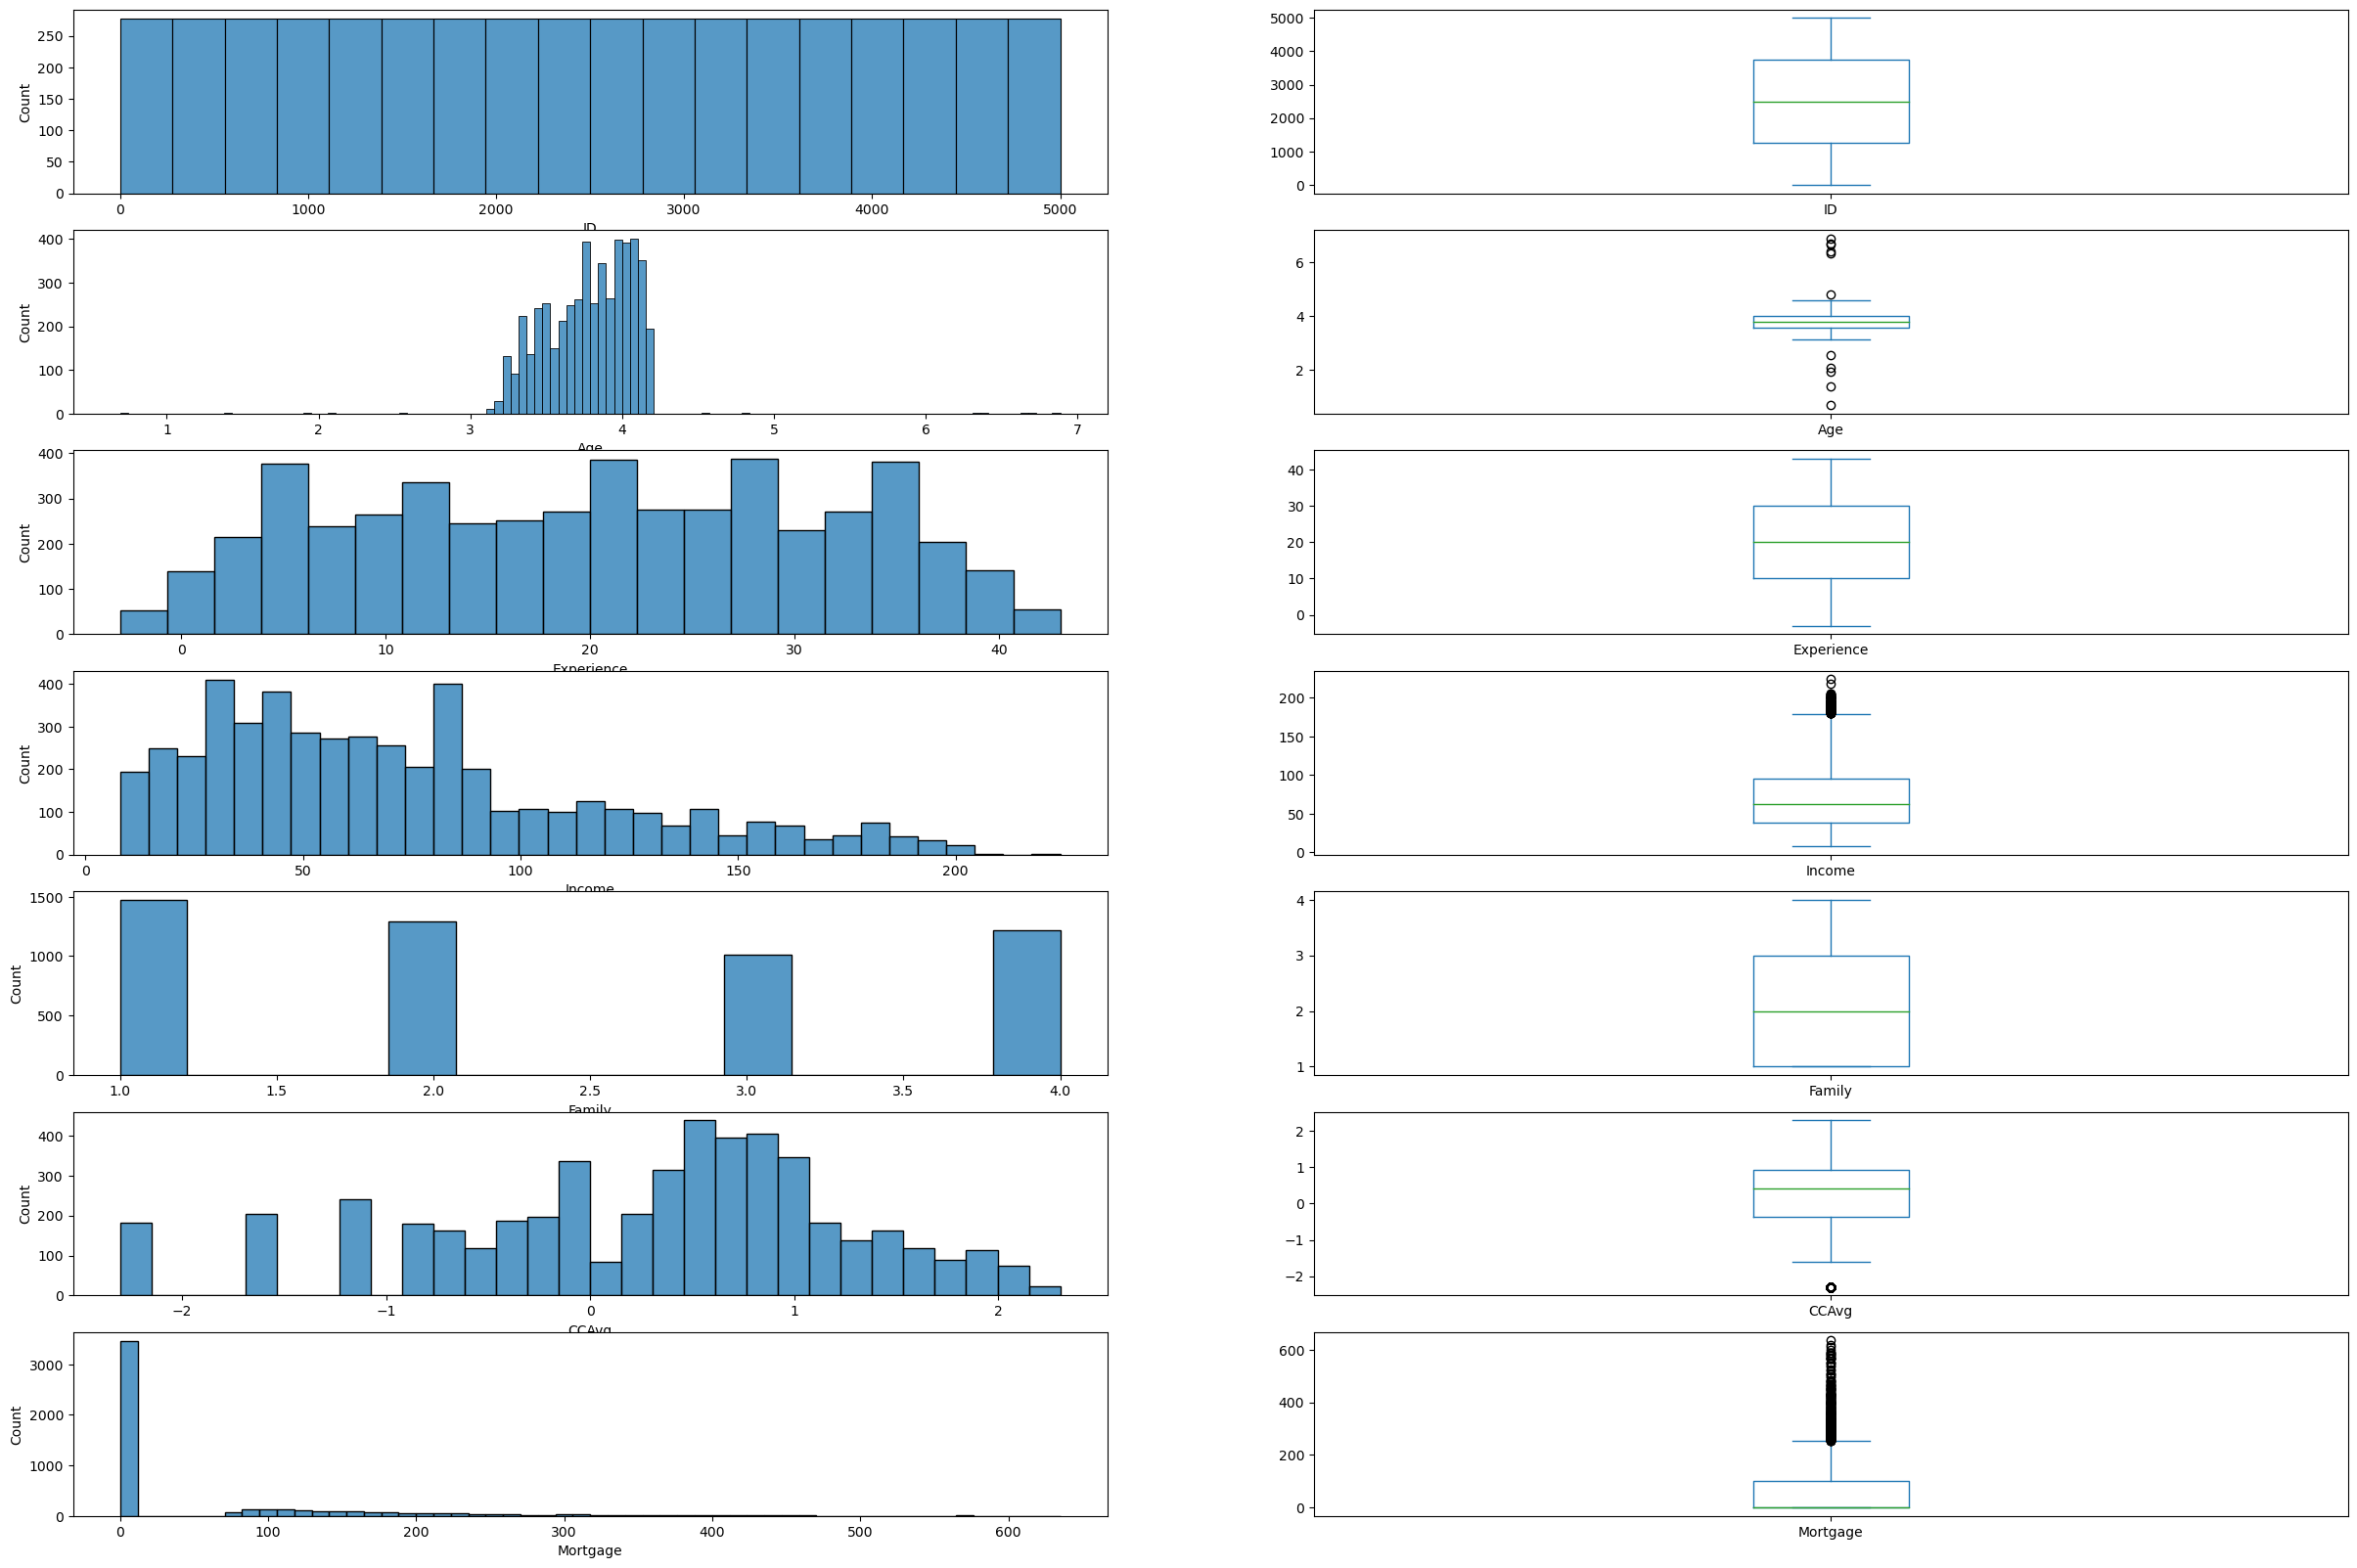

In [29]:
no_row = math.ceil(len(numeric_cols))
i = 1
for column in numeric_cols:
    plt.subplot(no_row,2,i)
    #plt.figure(figsize=(20,10)) 
    sns.histplot(df[column])
    #plt.title(label=column)
    i += 1
    plt.subplot(no_row,2,i)
    df[column].plot.box(figsize=(30,20))
    i += 1
plt.show()

## Processing categorical columns like: Zip Code. And implying encoding techniques

In [30]:
categorical_df["ZIP Code"].describe()

count     4999.000000
mean     93153.129826
std       2121.601426
min       9307.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIP Code, dtype: float64

## Considering zip code gives the information related to region of a country which might be very related to "Personal Loan Status"

## Considering the data to be from US siince the range of zip-code is within 00000 to 99950.
So, for now I am considering the national area(10 category), sectional center(100 category) and delivery area(100 category) as three category.
I have used the below image as reference.
zip1 = national area(10 category)
zip2 = sectional center(100 category)
zip3 = delivery area(100 category)


<img src ="https://www.serviceobjects.com/blog/wp-content/uploads/2019/03/ZipCodeDigits1.png">

In [31]:
temp_zip_df = categorical_df['ZIP Code'] 
categorical_df['zip3'] = temp_zip_df % 100
temp_zip_df = temp_zip_df//100
categorical_df['zip2'] = temp_zip_df % 100
temp_zip_df = temp_zip_df//100
categorical_df['zip1'] = temp_zip_df % 100

In [32]:
categorical_df

,ZIP Code,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Home Ownership,Gender,zip3,zip2,zip1
0,91107,1,0,1,0,0.0,0,Home Mortage,M,7,11,9
1,90089,1,0,1,0,0.0,0,Home Mortage,M,89,0,9
2,94720,1,0,0,0,0.0,0,Home Mortage,M,20,47,9
3,94112,2,0,0,0,0.0,0,Home Mortage,M,12,41,9
4,91330,2,0,0,0,0.0,1,Home Mortage,M,30,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,92697,3,0,0,0,1.0,0,Home Mortage,M,97,26,9
4996,92037,1,0,0,0,1.0,0,Home Mortage,M,37,20,9
4997,93023,3,0,0,0,0.0,0,Home Mortage,M,23,30,9
4998,90034,2,0,0,0,1.0,0,Home Mortage,M,34,0,9


In [33]:
## encoding all the zip columns:
## binary encoding is done on zip column cuz one-hot encoding would use maximun storage and cost:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['zip1'])
dfbin = encoder.fit_transform(categorical_df['zip1'])
categorical_df = pd.concat([categorical_df, dfbin], axis =1)

encoder = ce.BinaryEncoder(cols=['zip2'])
dfbin = encoder.fit_transform(categorical_df['zip2'])
categorical_df = pd.concat([categorical_df, dfbin], axis =1)

encoder = ce.BinaryEncoder(cols=['zip3'])
dfbin = encoder.fit_transform(categorical_df['zip3'])
categorical_df = pd.concat([categorical_df, dfbin], axis =1)

In [34]:
categorical_df = categorical_df.drop(['zip1','zip2','zip3'],axis=1) 
categorical_df.columns

Index(['ZIP Code', 'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Home Ownership', 'Gender',
       'zip1_0', 'zip1_1', 'zip2_0', 'zip2_1', 'zip2_2', 'zip2_3', 'zip2_4',
       'zip2_5', 'zip3_0', 'zip3_1', 'zip3_2', 'zip3_3', 'zip3_4', 'zip3_5',
       'zip3_6'],
      dtype='object')

In [35]:
#Label encoding for Gender
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Gender', 'Home Ownership']
encoder = LabelEncoder()

for column in cat_cols:
    categorical_df[column] = encoder.fit_transform(categorical_df[column])



In [36]:
## for education:
print("Education", categorical_df["Education"].unique()) ## It is fine as it is already ordinal encoded.
print("Securities Account", categorical_df["Securities Account"].unique()) ## fine cause already one-hot encoded.
print("CD Account", categorical_df["CD Account"].unique())  ## fine cause already one-hot encoded.
print("Online", categorical_df["Online"].unique())  ## fine cause already one-hot encoded. But requires to convert to int
print("CreditCard", categorical_df["CreditCard"].unique()) ## fine cause already one-hot encoded.

categorical_df['Online'] = categorical_df['Online'].astype(int)

print("online after int conversion",categorical_df["Online"].unique())

Education [1 2 3]
Securities Account [1 0]
CD Account [0 1]
Online [0. 1.]
CreditCard [0 1]
online after int conversion [0 1]


In [37]:
main_df = pd.concat([numeric_df,categorical_df],axis=1)

In [38]:
main_df = main_df.drop(['ZIP Code','ID'], axis=1)
main_df

,Age,Experience,Income,Family,CCAvg,Mortgage,Education,Personal Loan,Securities Account,CD Account,...,zip2_3,zip2_4,zip2_5,zip3_0,zip3_1,zip3_2,zip3_3,zip3_4,zip3_5,zip3_6
0,25.0,1.0,49.0,4.0,1.6,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,45.0,19.0,34.0,3.0,1.5,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,39.0,15.0,11.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,35.0,9.0,100.0,1.0,2.7,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,8.0,45.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30.0,4.0,15.0,4.0,0.4,85.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4996,63.0,39.0,24.0,2.0,0.3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4997,65.0,40.0,49.0,3.0,0.5,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4998,28.0,4.0,83.0,3.0,0.8,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [39]:
main_df.dropna(inplace=True)

In [40]:
## saving preprocessed to resulf.csv:
main_df.to_csv('no-drop-result.csv')

In [41]:
main_df['Personal Loan'].value_counts()

0.0    4519
1.0     479
Name: Personal Loan, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_21416\1235958406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(excel_df.corr())


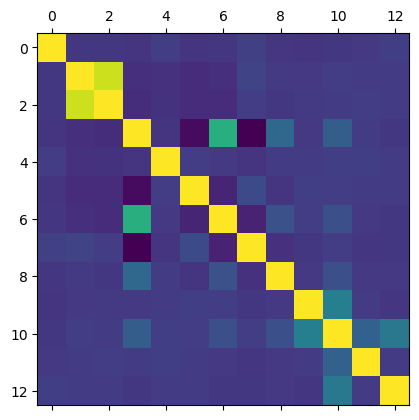

In [42]:
plt.matshow(excel_df.corr())